In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

### Data Collection, Visualization, and Feature Engineering

In [3]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
ticker = 'AAPL'
end = now
df = yf.download(ticker, start, end, auto_adjust=True, group_by='column')
df.columns = [col[0] for col in df.columns]

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400
2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000
2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200
2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400
2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df.describe()

,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,105.804162,106.868518,104.632201,105.704835,1.075205e+08
std,69.457949,70.142203,68.694443,69.385797,6.234692e+07
min,20.624050,20.927680,20.425436,20.546430,2.323470e+07
25%,39.935600,40.336456,39.592855,39.965166,6.556245e+07
50%,107.426971,109.372374,105.763625,107.482891,9.284480e+07
75%,166.885674,168.334480,165.370720,167.160214,1.303584e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [9]:
df.reset_index(inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400
1,2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000
2,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200
3,2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400
4,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400


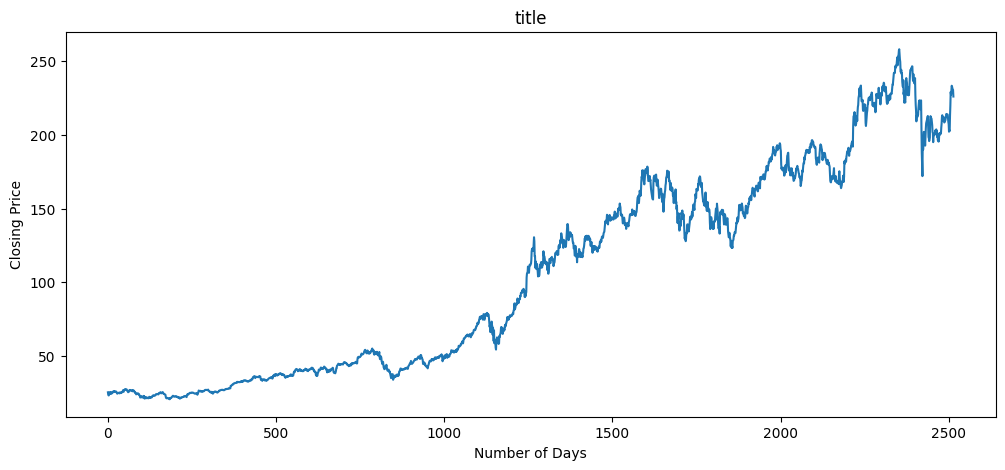

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title('title')
plt.xlabel('Number of Days')
plt.ylabel('Closing Price')
plt.show()

### Feature Engineering 
I'm going to use Moving Averages because they're a quick way of creating accurate predictions without in-depth financial knowledge

In [11]:
# Take the previous 100-days average, 200 days, and 30 days averages
df['MA_100'] = df['Close'].rolling(window=100).mean()
df.head(103)

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400,NaN
1,2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000,NaN
2,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN
3,2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400,NaN
4,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400,NaN
...,...,...,...,...,...,...,...
98,2016-01-11,22.236986,22.356600,21.968418,22.336289,198957600,NaN
99,2016-01-12,22.559723,22.724476,22.306952,22.692879,196616800,25.350327
100,2016-01-13,21.979708,22.837321,21.959397,22.640972,249758400,25.316970
101,2016-01-14,22.460423,22.677084,21.607324,22.108351,252680400,25.303905


In [12]:
# Add in 20-day and 60-day volatility. We want to capture short-term and long-term uncertainty in stocks

In [13]:
df['Return'] = df['Close'] / df['Close'].shift(1) - 1
df['Vol_20d'] = df['Return'].rolling(20).std()
df['Vol_60d'] = df['Return'].rolling(60).std()
df.head(65)

,Date,Close,High,Low,Open,Volume,MA_100,Return,Vol_20d,Vol_60d
0,2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400,NaN,NaN,NaN,NaN
1,2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000,NaN,-0.061163,NaN,NaN
2,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN,-0.024962,NaN,NaN
3,2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400,NaN,0.006012,NaN,NaN
4,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400,NaN,0.057355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,2015-11-13,25.353729,26.082701,25.337931,25.999196,183249600,NaN,-0.029209,0.018874,0.020780
61,2015-11-16,25.768997,25.782538,25.051311,25.137072,152426800,NaN,0.016379,0.019158,0.019252
62,2015-11-17,25.658415,25.965350,25.574910,25.936010,110467600,NaN,-0.004291,0.018778,0.018953
63,2015-11-18,26.470886,26.516023,26.066905,26.125585,186698800,NaN,0.031665,0.020039,0.019333


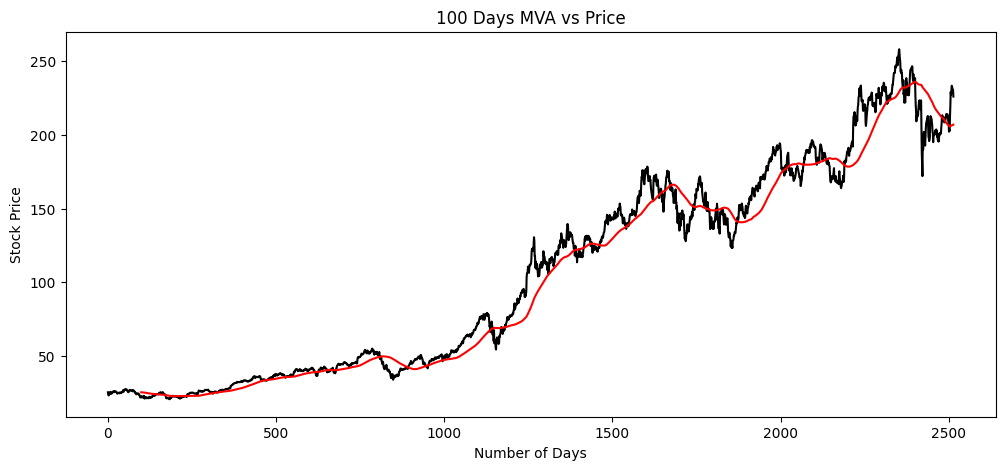

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], 'black')
plt.plot(df['MA_100'], 'r')
plt.title('100 Days MVA vs Price')
plt.xlabel('Number of Days')
plt.ylabel('Stock Price')
plt.show()

In [15]:
# Add in 200-Day and 30-day MVA and plot

In [16]:
df['MA_30'] = df['Close'].rolling(30).mean()
df['MA_200'] = df['Close'].rolling(200).mean()
df.head(205)

,Date,Close,High,Low,Open,Volume,MA_100,Return,Vol_20d,Vol_60d,MA_30,MA_200
0,2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000,NaN,-0.061163,NaN,NaN,NaN,NaN
2,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN,-0.024962,NaN,NaN,NaN,NaN
3,2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400,NaN,0.006012,NaN,NaN,NaN,NaN
4,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400,NaN,0.057355,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2016-06-07,22.607925,22.799693,22.591945,22.658150,89638000,22.724656,0.004056,0.013070,0.014785,21.862108,24.020813
201,2016-06-08,22.587379,22.728920,22.528023,22.605642,83392400,22.725926,-0.000909,0.013077,0.014780,21.825744,24.014915
202,2016-06-09,22.749464,22.827083,22.477794,22.486926,106405600,22.734210,0.007176,0.012755,0.014569,21.844175,24.012794
203,2016-06-10,22.562267,22.680979,22.482365,22.493778,126851600,22.741683,-0.008229,0.011428,0.014486,21.878981,24.009040


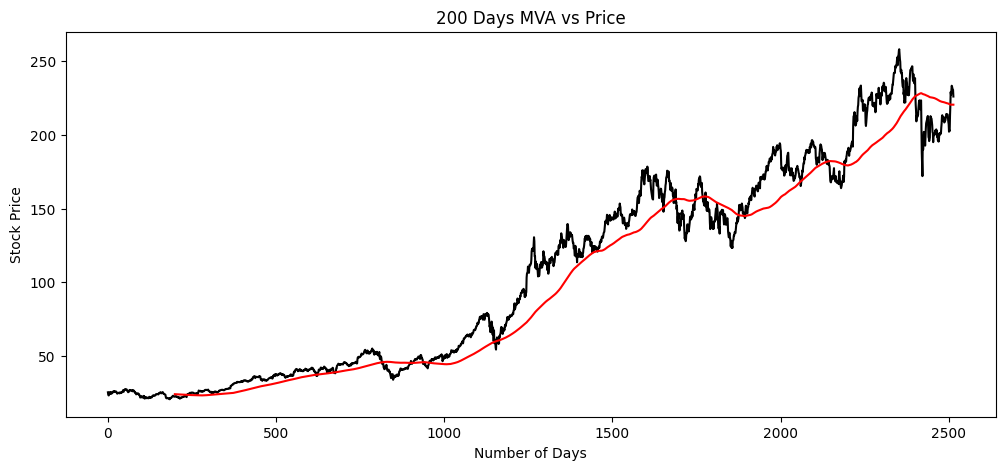

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], 'black')
plt.plot(df['MA_200'], 'r')
plt.title('200 Days MVA vs Price')
plt.xlabel('Number of Days')
plt.ylabel('Stock Price')
plt.show()

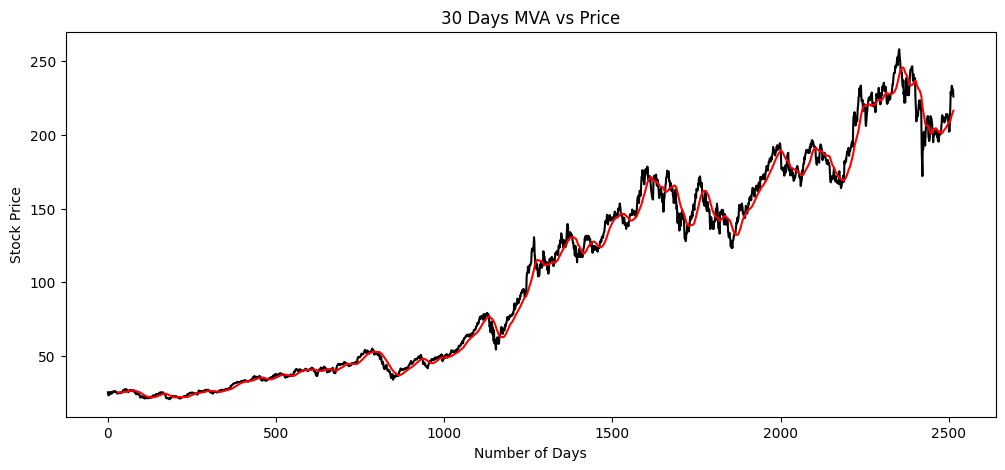

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], 'black')
plt.plot(df['MA_30'], 'r')
plt.title('30 Days MVA vs Price')
plt.xlabel('Number of Days')
plt.ylabel('Stock Price')
plt.show()

In [23]:
# 30 days might causing overfitting issues. will have to determine later if it should remain as a feature

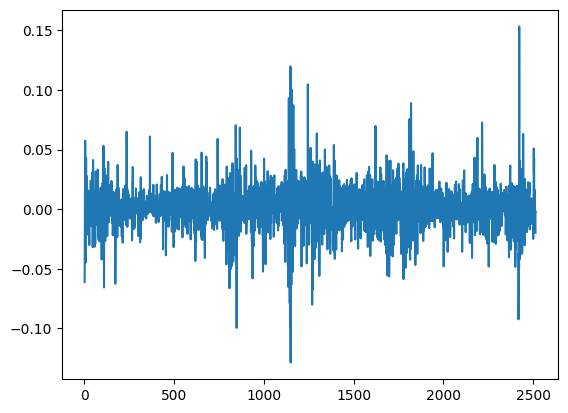

In [24]:
plt.plot(df['Return'])

In [25]:
df = df.rename(columns={'Return': 'Percent Return'})

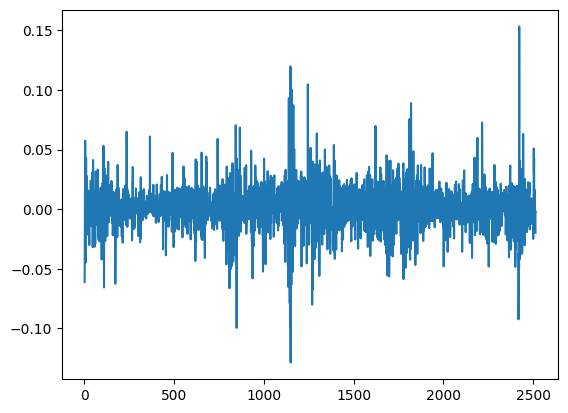

In [26]:
plt.plot(df['Percent Return'])

In [27]:
df.head(205)

,Date,Close,High,Low,Open,Volume,MA_100,Percent Return,Vol_20d,Vol_60d,MA_30,MA_200
0,2015-08-20,25.315338,25.697371,25.086117,25.636696,274006400,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-21,23.766981,25.146796,23.742261,24.816449,513102000,NaN,-0.061163,NaN,NaN,NaN,NaN
2,2015-08-24,23.173700,24.450142,20.674751,21.319714,648825200,NaN,-0.024962,NaN,NaN,NaN,NaN
3,2015-08-25,23.313023,24.969250,23.259089,24.969250,414406400,NaN,0.006012,NaN,NaN,NaN,NaN
4,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400,NaN,0.057355,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2016-06-07,22.607925,22.799693,22.591945,22.658150,89638000,22.724656,0.004056,0.013070,0.014785,21.862108,24.020813
201,2016-06-08,22.587379,22.728920,22.528023,22.605642,83392400,22.725926,-0.000909,0.013077,0.014780,21.825744,24.014915
202,2016-06-09,22.749464,22.827083,22.477794,22.486926,106405600,22.734210,0.007176,0.012755,0.014569,21.844175,24.012794
203,2016-06-10,22.562267,22.680979,22.482365,22.493778,126851600,22.741683,-0.008229,0.011428,0.014486,21.878981,24.009040


In [28]:
list(df.columns)

['Date',
 'Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'MA_100',
 'Percent Return',
 'Vol_20d',
 'Vol_60d',
 'MA_30',
 'MA_200']

In [29]:
new_order = [
    ('Date'),
    ('Open'),
    ('High'),
    ('Low'),
    ('Close'),
    ('Volume'),
    ('MA_30'),
    ('MA_100'),
    ('MA_200'),
    ('Vol_20d'),
    ('Vol_60d'),
    ('Percent Return')
]
df = df[new_order]

In [30]:
df.head(205)

,Date,Open,High,Low,Close,Volume,MA_30,MA_100,MA_200,Vol_20d,Vol_60d,Percent Return
0,2015-08-20,25.636696,25.697371,25.086117,25.315338,274006400,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-21,24.816449,25.146796,23.742261,23.766981,513102000,NaN,NaN,NaN,NaN,NaN,-0.061163
2,2015-08-24,21.319714,24.450142,20.674751,23.173700,648825200,NaN,NaN,NaN,NaN,NaN,-0.024962
3,2015-08-25,24.969250,24.969250,23.259089,23.313023,414406400,NaN,NaN,NaN,NaN,NaN,0.006012
4,2015-08-26,24.065861,24.695093,23.607422,24.650148,387098400,NaN,NaN,NaN,NaN,NaN,0.057355
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2016-06-07,22.658150,22.799693,22.591945,22.607925,89638000,21.862108,22.724656,24.020813,0.013070,0.014785,0.004056
201,2016-06-08,22.605642,22.728920,22.528023,22.587379,83392400,21.825744,22.725926,24.014915,0.013077,0.014780,-0.000909
202,2016-06-09,22.486926,22.827083,22.477794,22.749464,106405600,21.844175,22.734210,24.012794,0.012755,0.014569,0.007176
203,2016-06-10,22.493778,22.680979,22.482365,22.562267,126851600,21.878981,22.741683,24.009040,0.011428,0.014486,-0.008229


### Prepare Data for Model

In [31]:
df.shape

(2515, 12)

In [32]:
df = df.dropna()
df.shape

(2316, 12)

In [33]:
from sklearn.metrics import r2_score

r2_30mva = r2_score(df['Close'], df['MA_30'])
r2_30mva

0.9900073921808281

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,MA_30,MA_100,MA_200,Vol_20d,Vol_60d,Percent Return
199,2016-06-06,22.370498,23.260843,22.270050,22.516605,93170000,21.903308,22.718374,24.034350,0.013081,0.014844,0.007251
200,2016-06-07,22.658150,22.799693,22.591945,22.607925,89638000,21.862108,22.724656,24.020813,0.013070,0.014785,0.004056
201,2016-06-08,22.605642,22.728920,22.528023,22.587379,83392400,21.825744,22.725926,24.014915,0.013077,0.014780,-0.000909
202,2016-06-09,22.486926,22.827083,22.477794,22.749464,106405600,21.844175,22.734210,24.012794,0.012755,0.014569,0.007176
203,2016-06-10,22.493778,22.680979,22.482365,22.562267,126851600,21.878981,22.741683,24.009040,0.011428,0.014486,-0.008229


In [35]:
# Use SciKit for standardizaing the data (mean of 0, std for data range) and making test/train splits

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Close', 'Date', 'Volume', 'Percent Return', 'MA_200', 'High', 'Low'])
# Remove columns that are irrelevant or can cause too much bias. For example, dates do not matter here and are noisy. Also, high and lows
# reveal too much, they would remove the point of "prediction" since they would tell the model what the price is too accurately
y = df['Close']

# 80% train, 20% test. Data must be sequential, so no shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(          Open      MA_30     MA_100   Vol_20d   Vol_60d
 199  22.370498  21.903308  22.718374  0.013081  0.014844
 200  22.658150  21.862108  22.724656  0.013070  0.014785
 201  22.605642  21.825744  22.725926  0.013077  0.014780
 202  22.486926  21.844175  22.734210  0.012755  0.014569
 203  22.493778  21.878981  22.741683  0.011428  0.014486,
             Open       MA_30      MA_100   Vol_20d   Vol_60d
 1820  139.275776  141.688016  149.522659  0.034827  0.026470
 1821  143.792103  142.073542  149.668222  0.034058  0.026619
 1822  146.898272  142.272928  149.771076  0.033685  0.026582
 1823  150.103075  142.410388  149.857959  0.033716  0.026497
 1824  147.056078  142.496917  149.932515  0.033805  0.026512,
 199    22.516605
 200    22.607925
 201    22.587379
 202    22.749464
 203    22.562267
 Name: Close, dtype: float64,
 1820    144.827469
 1821    147.618134
 1822    146.217865
 1823    147.953384
 1824    146.720795
 Name: Close, dtype: float64)

In [37]:
type(y_train)

pandas.core.series.Series

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
y_train_scaled = min_max_scaler.fit_transform(y_train.to_frame())

In [39]:
X_train_scaled.shape

(1621, 5)

In [40]:
n_features = int(X_train_scaled.shape[1])
n_features

5

In [41]:
y_train_scaled.shape

(1621, 1)

In [42]:
X_train.columns

Index(['Open', 'MA_30', 'MA_100', 'Vol_20d', 'Vol_60d'], dtype='object')

In [43]:
#Make the sequential data. turn into blocks of 100
X_train_seq = []
y_train_seq = []
# k determines how many days out we are predicting. For now, we predict 5 days out
days_out = 1
k = days_out - 1

#start with 1 day out. k will take days_out and automatically change it. Never do days_out < 1.
for i in range(100+k, len(X_train_scaled)):
    X_train_seq.append(X_train_scaled[i-100-k:i-k])
    y_train_seq.append(y_train_scaled[i, 0])
X_train_seq, y_train_seq = np.array(X_train_seq), np.array(y_train_seq)
X_train_seq[:2], y_train_seq[:2]

(array([[[-0.98527635, -0.99896346, -1.        , -0.73836972,
          -0.57068999],
         [-0.98163155, -0.99951405, -0.99991248, -0.73872802,
          -0.57374771],
         [-0.98229688, -1.        , -0.99989479, -0.73852454,
          -0.57398754],
         [-0.98380111, -0.9997537 , -0.99977938, -0.74869338,
          -0.5848988 ],
         [-0.98371428, -0.99928855, -0.99967526, -0.7907048 ,
          -0.58919959],
         [-0.98325144, -0.99886476, -0.99962263, -0.76504715,
          -0.58328837],
         [-0.98721444, -0.99841865, -0.99955077, -0.8555518 ,
          -0.58327435],
         [-0.98576802, -0.99816075, -0.99965007, -0.8564281 ,
          -0.58318183],
         [-0.98973107, -0.99776108, -0.99967408, -0.86432642,
          -0.5846653 ],
         [-0.98923924, -0.99754854, -0.99978598, -0.81807614,
          -0.57159316],
         [-0.99103282, -0.9973065 , -0.99969863, -0.82629828,
          -0.57179933],
         [-0.99409902, -0.99698921, -0.99960658, -0.83

### Make the LSTM and Train

In [44]:
import tensorflow as tf
print(tf.__version__)

c:\GitProjects\stockerTracker\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\GitProjects\stockerTracker\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\GitProjects\stockerTracker\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid

2.20.0-rc0


In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [46]:
model = Sequential()

model.add(Input(shape=(100,n_features)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(1))

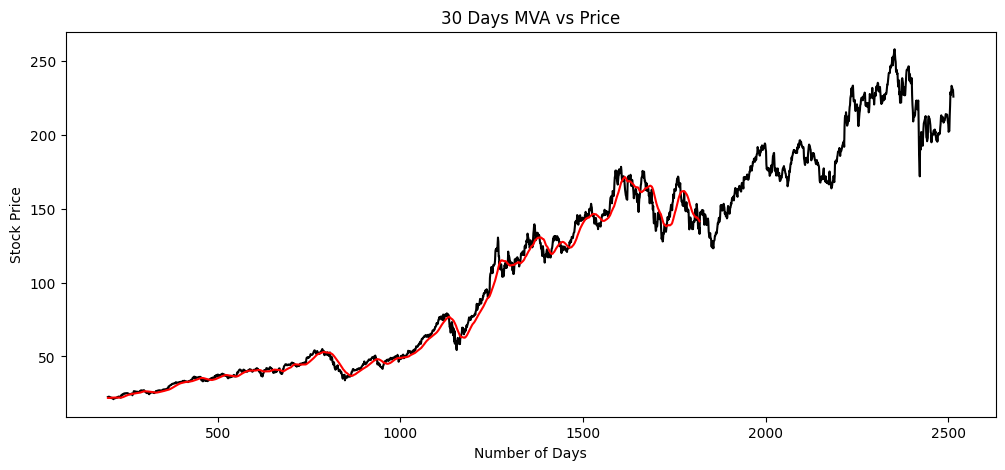

In [47]:
plt.figure(figsize=(12,5))
train = pd.concat([X_train, y_train], axis = 1)
plt.plot(df['Close'], 'black')
plt.plot(train['MA_30'], 'r')
plt.title('30 Days MVA vs Price')
plt.xlabel('Number of Days')
plt.ylabel('Stock Price')
plt.show()
#if we do same-day predictions with 30-day mva, next-day stock predictions should hopefully be in the high 90s

In [ ]:
# Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_seq, y_train_seq, epochs=100)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0318
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0048
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0036
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0032
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0028
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0024
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0023
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0022
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0022
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0020
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0019
Epoch 13/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0019
Epoch 14/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0019
Epoch 15/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - lo

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 100, 128)            │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,003 (1.37 MB)

 Trainable params: 119,667 (467.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 239,336 (934.91 KB)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Make predictions on your training set
y_pred_train = model.predict(X_train_seq)

# Compute R² using sklearn
r2_train = r2_score(y_train_seq, y_pred_train)

print("Training R Squared:", r2_train)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 
Training R Squared: 0.9980389245622461


In [ ]:
# Save the model
model.save('stock_prediction_model.keras')

### Compare with Test Data

In [ ]:
X_test.shape

(695, 5)

In [ ]:
last_100 = X_train.tail(100)

In [ ]:
last_100

,Open,MA_30,MA_100,Vol_20d,Vol_60d
1720,146.233954,147.020304,159.147967,0.028340,0.024294
1721,144.757621,146.570838,158.853135,0.027056,0.024413
1722,138.064993,145.709001,158.536169,0.027766,0.024562
1723,130.771981,144.871152,158.202572,0.027747,0.024970
1724,131.027864,144.052017,157.894518,0.027834,0.024807
...,...,...,...,...,...
1815,145.067111,144.658084,148.947074,0.023749,0.020308
1816,147.925289,144.608806,148.960278,0.024109,0.020468
1817,148.782718,144.413005,149.001393,0.024358,0.020585
1818,145.934389,144.164310,148.990184,0.022672,0.020278


In [ ]:
X_final_testing = pd.concat([last_100, X_test], ignore_index=True)
X_final_testing

,Open,MA_30,MA_100,Vol_20d,Vol_60d
0,146.233954,147.020304,159.147967,0.028340,0.024294
1,144.757621,146.570838,158.853135,0.027056,0.024413
2,138.064993,145.709001,158.536169,0.027766,0.024562
3,130.771981,144.871152,158.202572,0.027747,0.024970
4,131.027864,144.052017,157.894518,0.027834,0.024807
...,...,...,...,...,...
790,204.509995,208.817334,206.077757,0.008460,0.013917
791,203.399994,208.864667,205.939999,0.008450,0.013902
792,205.630005,209.296334,205.978445,0.014452,0.015338
793,218.880005,209.912001,206.046640,0.016025,0.013636


In [ ]:
X_final_testing.shape

(795, 5)

In [ ]:
y_past_100 = y_train.tail(100)
y_final_testing = pd.concat([y_past_100, y_test], ignore_index=True)
y_final_testing

0      145.623749
1      140.387726
2      134.964737
3      129.797623
4      130.663696
          ...    
790    203.350006
791    202.919998
792    213.250000
793    220.029999
794    229.350006
Name: Close, Length: 795, dtype: float64

In [ ]:
X_test_scaled = min_max_scaler.fit_transform(X_final_testing)
y_test_scaled = min_max_scaler.fit_transform(y_final_testing.to_frame())

In [ ]:
#Make the sequential data. turn into blocks of 100
X_test_seq = []
y_test_seq = []

for i in range(100, len(X_test_scaled)):
    X_test_seq.append(X_test_scaled[i-100:i])
    y_test_seq.append(y_test_scaled[i, 0])
X_test_seq, y_test_seq = np.array(X_test_seq), np.array(y_test_seq)

In [ ]:
X_test_seq[0:10]

array([[[-0.67206821, -0.74174691, -0.61613004, -0.01790135,
          0.26114608],
        [-0.69424036, -0.74965811, -0.62231176, -0.07422153,
          0.27082566],
        [-0.79475285, -0.7648276 , -0.62895758, -0.04309198,
          0.28286116],
        ...,
        [-0.63378989, -0.78763888, -0.82887267, -0.19263407,
         -0.03979453],
        [-0.6765672 , -0.79201623, -0.8291077 , -0.2666131 ,
         -0.06467031],
        [-0.67464295, -0.78910185, -0.82761236, -0.07919365,
          0.12520769]],

       [[-0.69424036, -0.74965811, -0.62231176, -0.07422153,
          0.27082566],
        [-0.79475285, -0.7648276 , -0.62895758, -0.04309198,
          0.28286116],
        [-0.90428214, -0.77957486, -0.63595208, -0.04392184,
          0.3159983 ],
        ...,
        [-0.6765672 , -0.79201623, -0.8291077 , -0.2666131 ,
         -0.06467031],
        [-0.67464295, -0.78910185, -0.82761236, -0.07919365,
          0.12520769],
        [-0.60122592, -0.78976105, -0.8264582 , 

In [49]:
y_test_seq[:10], y_test_seq.shape

NameError: name 'y_test_seq' is not defined

In [ ]:
X_test_seq.shape, y_test_seq.shape

((695, 100, 5), (695,))

In [ ]:
y_predicted = model.predict(X_test_seq)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
y_predicted[0:10]

array([[-0.6899016 ],
       [-0.670655  ],
       [-0.6452872 ],
       [-0.6586752 ],
       [-0.70670724],
       [-0.73914814],
       [-0.7679377 ],
       [-0.7795931 ],
       [-0.78848135],
       [-0.7836146 ]], dtype=float32)

In [ ]:
y_predicted = min_max_scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test_seq = min_max_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

In [ ]:
y_predicted[:10]

array([144.34909, 145.648  , 147.36   , 146.45648, 143.2149 , 141.02554,
       139.08261, 138.29602, 137.69617, 138.02461], dtype=float32)

In [ ]:
y_test_seq[:10]

array([151.12838745, 148.47718811, 142.9382782 , 136.87695312,
       136.61038208, 137.14350891, 137.71606445, 133.14527893,
       144.99182129, 147.78564453])

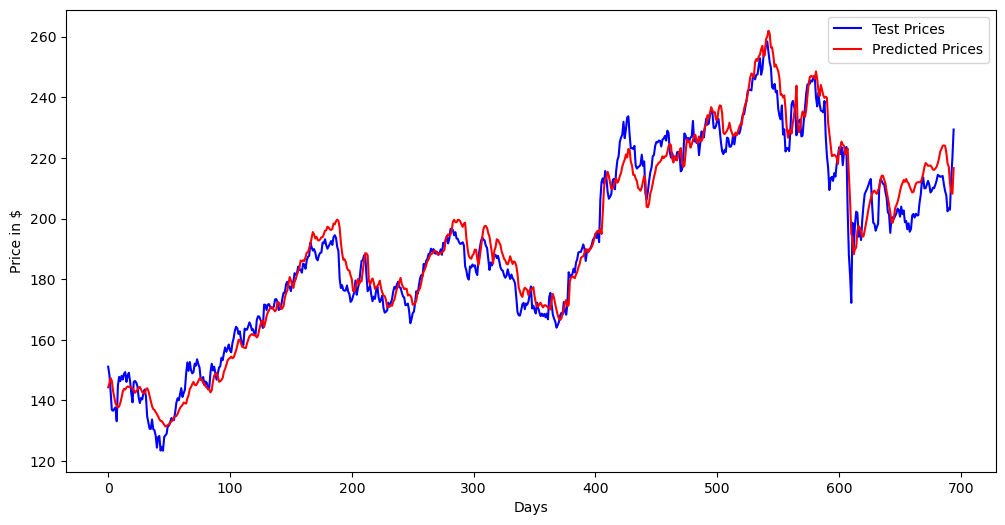

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_seq, 'blue', label='Test Prices')
plt.plot(y_predicted, 'red', label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price in $')
plt.legend()

### Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test_seq, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 38.46749339584109


In [ ]:
# Get RMSE as well.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error is: {rmse}")

Root Mean Squared Error is: 6.202216813030732


In [ ]:
# Get the R squared score
r2 = r2_score(y_test_seq, y_predicted)
print(r2)

0.9582560785210841


In [ ]:
# get a prediction on today from 5 days old data
last_predict = model.predict(X_test_seq[-1:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
last_predict = min_max_scaler.inverse_transform(last_predict.reshape(-1, 1)).flatten()
last_predict

array([216.62828], dtype=float32)